In [344]:
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import *
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

In [345]:
algo_list=['Louvain',
    'Leiden',
    'stLearn',
    'BayesSpace',
    'SEDR',
    'SpaGCN_with',
    'SpaGCN_without',
    'SCAN-IT',
    'conST_nopre',
    # 'conST_pre',
    'STAGATE',
    'CCST',
    'SpaceFlow',
    'BASS',
    'DeepST']

data_name=['151507','151508','151509','151510','151669','151670',
        '151671','151672','151673','151674','151675','151676']

In [346]:
pd_dict = {
    'replicate':[],
    'preprocess':[],
    # 'algorithm':[],
    'dataset':[],
    'NMI':[],
    'ARI':[],

    'NMI_median':[],
    'ARI_median':[]
}

In [347]:
m=13
for n in range(12):
    path = f'/home/workspace2/zhaofangyuan/domain_output/preprocess/{algo_list[m]}/{data_name[n]}'
    for file in os.listdir(path):
        file_whole = f'{path}/{file}'
        adata = sc.read_h5ad(file_whole)

        algorithm = f'{algo_list[m]}'
        preprocess = file[:-5].split('_')[-1]
        dataset = f'{data_name[n]}'
        for i in range(5):
            obs_df = adata.obs.dropna()
            pred_label = obs_df[f'pred_{i+1}']
            true_label = obs_df['Region']

            # pred_label = adata.obs[f'pred_{i+1}']
            # true_label = adata.obs['Region']
            nmi = normalized_mutual_info_score(pred_label,true_label)
            ari = adjusted_rand_score(pred_label,true_label)
            
            pd_dict['replicate'].append(i)
            pd_dict['preprocess'].append(preprocess)   
            pd_dict['dataset'].append(dataset)    
            pd_dict['NMI'].append(nmi)
            pd_dict['ARI'].append(ari)
 

In [348]:
for j in range(0,len(pd_dict['NMI']),5):
    temp=[pd_dict['NMI'][j],pd_dict['NMI'][j+1],pd_dict['NMI'][j+2],pd_dict['NMI'][j+3],pd_dict['NMI'][j+4]]
    med=np.median(temp)


    pd_dict['NMI_median'].append(med)
    pd_dict['NMI_median'].append(med)
    pd_dict['NMI_median'].append(med)
    pd_dict['NMI_median'].append(med)
    pd_dict['NMI_median'].append(med)

In [349]:
for j in range(0,len(pd_dict['ARI']),5):
    temp=[pd_dict['ARI'][j],pd_dict['ARI'][j+1],pd_dict['ARI'][j+2],pd_dict['ARI'][j+3],pd_dict['ARI'][j+4]]
    med=np.median(temp)


    pd_dict['ARI_median'].append(med)
    pd_dict['ARI_median'].append(med)
    pd_dict['ARI_median'].append(med)
    pd_dict['ARI_median'].append(med)
    pd_dict['ARI_median'].append(med)

In [351]:
pd_df = pd.DataFrame(pd_dict)
pd_df['ARI']=pd_df['ARI_median']
pd_df['NMI']=pd_df['NMI_median']
pd_df

,replicate,preprocess,dataset,NMI,ARI,NMI_median,ARI_median
0,0,svg,151507,0.652070,0.511700,0.652070,0.511700
1,1,svg,151507,0.652070,0.511700,0.652070,0.511700
2,2,svg,151507,0.652070,0.511700,0.652070,0.511700
3,3,svg,151507,0.652070,0.511700,0.652070,0.511700
4,4,svg,151507,0.652070,0.511700,0.652070,0.511700
...,...,...,...,...,...,...,...
175,0,svg,151676,0.622367,0.522023,0.622367,0.522023
176,1,svg,151676,0.622367,0.522023,0.622367,0.522023
177,2,svg,151676,0.622367,0.522023,0.622367,0.522023
178,3,svg,151676,0.622367,0.522023,0.622367,0.522023


In [352]:
# for j in range(0,len(pd_df),5):
#     new_pd_df=pd_df.iloc[j:j+5,:]
#     new_pd_df['NMI_median']=[new_pd_df['ARI'].median() for i in range(len(new_pd_df)) ]


#     pd_dict['NMI_median'].append(new_pd_df['NMI_median'].tolist()[0])
#     pd_dict['NMI_median'].append(new_pd_df['NMI_median'].tolist()[0])
#     pd_dict['NMI_median'].append(new_pd_df['NMI_median'].tolist()[0])
#     pd_dict['NMI_median'].append(new_pd_df['NMI_median'].tolist()[0])
#     pd_dict['NMI_median'].append(new_pd_df['NMI_median'].tolist()[0])

In [353]:
# pd_df['ARI_median']=pd_df.iloc[:,2:4].median(axis=1)
# pd_df['NMI_median']=[pd_df['NMI'].median() for i in range(len(pd_df)) ]

In [354]:

import palettable


cmp = palettable.tableau.Tableau_20.mpl_colors
cmp_order = [cmp[1],cmp[3],cmp[5]]
# cmp_order = [cmp[0],cmp[2],cmp[4]]
preprocess_order=['hvg','svg','none']
preprocess_color_dict = dict(zip(preprocess_order,cmp_order))

In [355]:
preprocess_order

['hvg', 'svg', 'none']

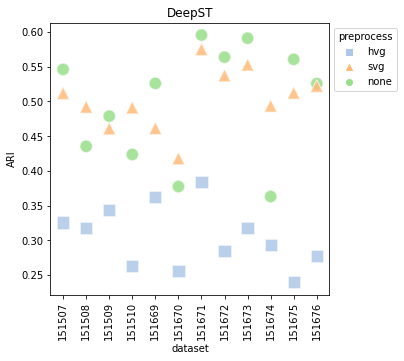

In [356]:

fig,ax = plt.subplots(1,1,figsize=(5,5))
markers = {"hvg": "s", "svg": "^","none":"o"}
p=sns.scatterplot(data=pd_df, x="dataset", y="ARI", hue="preprocess", style="preprocess",s=150,
        ax=ax,palette=preprocess_color_dict,hue_order=preprocess_order,markers=markers,alpha = 0.3)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))

p.set_title(f"{algo_list[m]}")
plt.xticks(rotation = 90)
plt.savefig(f'./preprocess_algorithm/preprocess_ari_{algo_list[m]}(scatterplot).pdf',dpi=400,bbox_inches='tight',transparent=True)


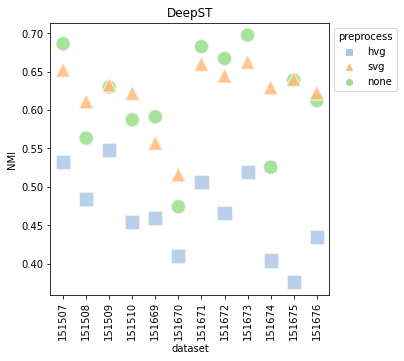

In [357]:

fig,ax = plt.subplots(1,1,figsize=(5,5))
markers = {"hvg": "s", "svg": "^","none":"o"}
# fill=False
p=sns.scatterplot(data=pd_df, x="dataset", y="NMI", hue="preprocess", style="preprocess",
    ax=ax,palette=preprocess_color_dict,hue_order=preprocess_order,s=200,markers=markers,alpha = 0.3)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))

p.set_title(f"{algo_list[m]}")
plt.xticks(rotation = 90)
plt.savefig(f'./preprocess_algorithm/preprocess_nmi_{algo_list[m]}(scatterplot).pdf',dpi=400,bbox_inches='tight',transparent=True)